## Predicting Bigg Boss Kannada (ಬಿಗ್ ಬಾಸ್ ಕನ್ನಡ) Season 7 Winner

## Using Python scikit learn https://satya-python.blogspot.com/

### Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

### Import dataset

In [3]:
bigg_boss = pd.read_csv('/kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 545 rows and 21 columns


## Exploratory Data Analysis (EDA)

In [4]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,3.0,2.72,0.0,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,6.0,2.72,0.0,0.0,0.0


In [5]:
bigg_boss.tail(10).T

,535,536,537,538,539,540,541,542,543,544
Language,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam
Season Number,1,1,1,1,1,1,1,1,1,1
Name,Hima Shankar,Manoj K. Verma,Pearle Maaney,Ranjini Haridas,Sabumon Abdusamad,Shweta Menon,Sreelakshmi Sreekumar,Srinish Aravind,Anjali Ameer,Shiyas Kareem
Profession,Actress,Businessman,Actress,TV Anchor,TV Anchor,Actress,Actress,Soap Actor,Actress,Actor
Gender,Female,Male,Female,Female,Male,Female,Female,Male,Female,Male
Entry Date,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,NaN,NaN
Elimination Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,11,NaN,14,9,NaN,5,4,14,NaN,14
Wild Card,No,No,No,No,No,No,No,No,Yes,Yes
Season Length,98,98,98,98,98,98,98,98,98,98


In [6]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
142,Hindi,9,Kishwar Merchant,Soap Actress,Female,11-Oct-15,NaN,NaN,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,0,Colors,NaN,2.90,NaN,NaN,0.0
438,Tamil,2,Riythvika,Actress,Female,17-Jun-18,NaN,NaN,No,105,17,17-Jun-18,30-Sep-18,Kamal Haasan,"50,00,000",Start Vijay,6.0,8.20,0.0,NaN,1.0
207,Hindi,12,Shivashish Mishra,Commoner,NaN,16-Sep-18,NaN,9.0,No,105,20,16-Sep-18,30-Dec-18,Salman Khan,0,Colors,NaN,4.99,NaN,NaN,0.0
291,Kannada,4,Rekha,Actress,Female,09-Oct-16,NaN,NaN,No,112,18,09-Oct-16,29-Jan-17,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,0.0
23,Hindi,2,Rahul Mahajan,Politician,Male,17-Aug-08,NaN,NaN,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,0,Colors,4.0,2.89,0.0,0.0,0.0
188,Hindi,11,Sapna Choudhary,Stage Actress,Female,01-Oct-17,26-Nov-17,8.0,No,106,19,01-Oct-17,14-Jan-18,Salman Khan,0,Colors,NaN,7.64,NaN,NaN,0.0
98,Hindi,7,Anita Advani,Actress,Female,15-Sep-13,NaN,4.0,No,105,20,15-Sep-13,28-Dec-13,Salman Khan,0,Colors,NaN,4.40,NaN,NaN,0.0
543,Malayam,1,Anjali Ameer,Actress,Female,NaN,NaN,NaN,Yes,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,Asianet,5.0,NaN,0.0,NaN,0.0
224,Hindi,13,Shehnaaz Gill,Singer,Female,29-Sep-19,NaN,NaN,No,105,19,29-Sep-19,12-Jan-20,Salman Khan,NaN,Colors,NaN,NaN,NaN,NaN,NaN
206,Hindi,12,Shanthakumaran Sreesanth,Sports Person,Male,16-Sep-18,30-Dec-18,15.0,No,105,20,16-Sep-18,30-Dec-18,Salman Khan,0,Colors,NaN,4.99,NaN,NaN,0.0


In [7]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
Language                              545 non-null object
Season Number                         545 non-null int64
Name                                  545 non-null object
Profession                            545 non-null object
Gender                                462 non-null object
Entry Date                            470 non-null object
Elimination Date                      96 non-null object
Elimination Week Number               438 non-null float64
Wild Card                             545 non-null object
Season Length                         545 non-null int64
Number of Housemates                  545 non-null int64
Season Start Date                     545 non-null object
Season End Date                       526 non-null object
Host Name                             545 non-null object
Prize Money (INR)                     531 non-null object
Broadcasted By              

In [8]:
bigg_boss.describe()

,Season Number,Elimination Week Number,Season Length,Number of Housemates,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
count,545.000000,438.000000,545.000000,545.000000,333.000000,312.000000,317.000000,140.000000,516.000000
mean,4.682569,8.831050,99.862385,17.755963,3.648649,4.899423,0.082019,0.421429,0.056202
std,3.585122,4.586693,7.975223,1.727025,2.534040,1.977119,0.296965,0.657747,0.230534
min,1.000000,1.000000,70.000000,15.000000,0.000000,2.720000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,98.000000,16.000000,1.000000,2.900000,0.000000,0.000000,0.000000
50%,3.000000,9.000000,99.000000,18.000000,3.000000,4.400000,0.000000,0.000000,0.000000
75%,7.000000,13.000000,105.000000,19.000000,5.000000,6.500000,0.000000,1.000000,0.000000
max,13.000000,16.000000,112.000000,20.000000,11.000000,8.800000,2.000000,3.000000,1.000000


In [9]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 13
Number of unique values in Name - 544
Number of unique values in Profession - 69
Number of unique values in Gender - 3
Number of unique values in Entry Date - 36
Number of unique values in Elimination Date - 53
Number of unique values in Elimination Week Number - 16
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 12
Number of unique values in Number of Housemates - 6
Number of unique values in Season Start Date - 31
Number of unique values in Season End Date - 28
Number of unique values in Host Name - 15
Number of unique values in Prize Money (INR) - 4
Number of unique values in Broadcasted By - 11
Number of unique values in Number of Evictions Faced - 12
Number of unique values in Average TRP - 17
Number of unique values in Number of re-entries - 3
Number of unique values in Number of times elected as Captain - 4
Number of unique values in Winner - 2


In [10]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

# 31 seasons happened (including current seasons)

31


## https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

## Bigg Boss Hindi has many seasons compared to other Indian languages. So, number of housemates are more in Hindi.

In [11]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi      13
Kannada     7
Tamil       3
Telugu      3
Bengali     2
Marathi     2
Malayam     1
Name: Season Number, dtype: int64


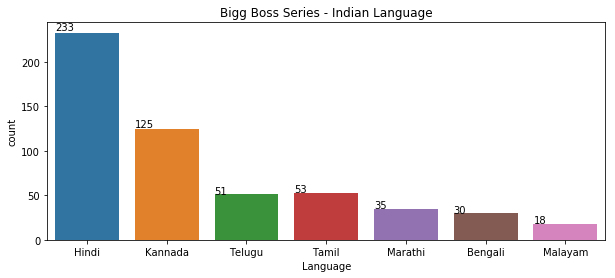

In [12]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates (85%) entered in first day/week

No     463
Yes     82
Name: Wild Card, dtype: int64 

No     85.0
Yes    15.0
Name: Wild Card, dtype: float64


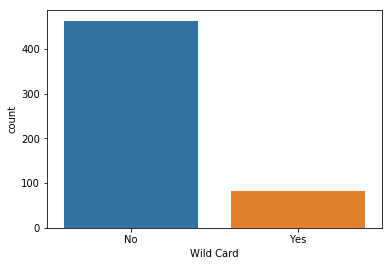

In [13]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

## Number of film actress entered into the Bigg Boss houses, are more when compared to other professions 

Actress                            129
Actor                               94
Model                               39
Soap Actress                        36
Singer                              28
                                  ... 
Activist                             1
Musician                             1
Commoner - Voice Trainer             1
RJ                                   1
Commoner - Sales Representative      1
Name: Profession, Length: 69, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text xticklabel objects>)

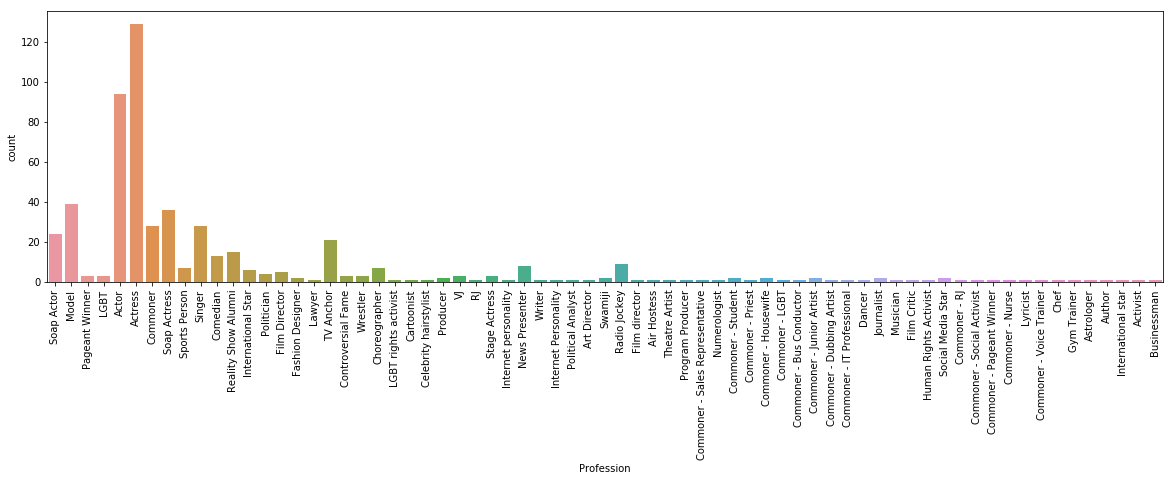

In [14]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(20,5))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

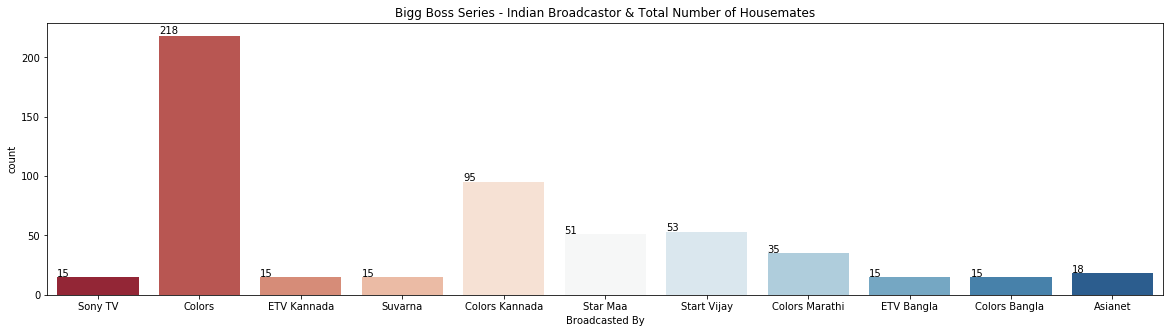

In [15]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next in the list

In [16]:
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan                8
Sudeep                     7
Kamal Haasan               3
Mahesh Manjrekar           2
Amitabh Bachchan           1
Arshad Warsi               1
Jeet                       1
Jr. NTR                    1
Mithun Chakraborthy        1
Mohanlal                   1
Nagarjuna                  1
Nani                       1
Salman Khan/Farah Khan     1
Salman Khan/Sanjay Dutt    1
Shilpa Shetty              1
Name: Season Number, dtype: int64

## In all Bigg Boss languages, and in all seasons, Female contestants are more

In [17]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts())

# Female         238
# Male           220
# Transgender      4

Female         238
Male           220
Transgender      4
Name: Gender, dtype: int64


### Only 4 Transgenders participated in all Indian languages

In [18]:
# Maximum TRP of Bigg Boss Hindi/India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 8.8 

Language  Season Number
   Tamil              3


## https://satya-data.blogspot.com/2018/01/bigg-boss-data-set-bigg-boss.html

In [19]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
8,Hindi,1,Rahul Roy,Actor,Male,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,"1,00,00,000",Sony TV,4.0,2.72,0.0,0.0,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,17-Aug-08,NaN,NaN,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,"1,00,00,000",Colors,4.0,2.89,0.0,0.0,1.0
42,Hindi,3,Vindu Dara Singh,Actor,Male,04-Oct-09,NaN,NaN,No,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,"1,00,00,000",Colors,7.0,2.83,0.0,0.0,1.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,03-Oct-10,NaN,NaN,No,96,16,03-Oct-10,08-Jan-11,Salman Khan,"1,00,00,000",Colors,4.0,4.95,0.0,2.0,1.0
62,Hindi,5,Juhi Parmar,Soap Actress,Female,02-Oct-11,NaN,NaN,No,98,18,02-Oct-11,07-Jan-12,Salman Khan/Sanjay Dutt,"1,00,00,000",Colors,4.0,4.19,NaN,NaN,1.0
92,Hindi,6,Urvashi Dholakia,Actress,Female,07-Oct-12,NaN,NaN,No,97,19,07-Oct-12,12-Jan-13,Salman Khan,"50,00,000",Colors,NaN,3.81,NaN,NaN,1.0
102,Hindi,7,Gauhar Khan,Actress,Female,15-Sep-13,NaN,NaN,No,105,20,15-Sep-13,28-Dec-13,Salman Khan,"50,00,000",Colors,NaN,4.40,NaN,NaN,1.0
121,Hindi,8,Gautam Gulati,Actor,Male,21-Sep-14,NaN,NaN,No,105,19,21-Sep-14,03-Jan-15,Salman Khan/Farah Khan,"50,00,000",Colors,NaN,3.77,NaN,NaN,1.0
144,Hindi,9,Prince Narula,Reality Show Alumni,Male,11-Oct-15,NaN,NaN,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,"50,00,000",Colors,NaN,2.90,NaN,NaN,1.0
164,Hindi,10,Manveer Gurjar,Commoner,NaN,16-Oct-16,NaN,NaN,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,"50,00,000",Colors,NaN,3.54,NaN,NaN,1.0


In [20]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actress                6
Actor                  6
Singer                 4
Soap Actress           3
Reality Show Alumni    3
Commoner               2
TV Anchor              2
Model                  1
Film Director          1
Soap Actor             1
Name: Profession, dtype: int64

In [21]:
# Gender of Season title Winners
bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts()

# Male      19
# Female     9

Male      19
Female     9
Name: Gender, dtype: int64

In [22]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

4.0     7
5.0     3
6.0     3
7.0     3
9.0     1
11.0    2
Name: Number of Evictions Faced, dtype: int64

## No wild card entry housemate won the Bigg Boss competition.

In [23]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    29
Name: Wild Card, dtype: int64

In [24]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0.0    18
Name: Number of re-entries, dtype: int64

In [25]:
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()
# data is not up-to-date

0.0    3
1.0    2
2.0    2
3.0    1
Name: Number of times elected as Captain, dtype: int64

## BB Kannada Seasons

In [27]:
lang='Kannada'
bigg_boss.loc[(bigg_boss['Language']==lang)]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
233,Kannada,1,Anushree,TV Anchor,Female,24-Mar-13,NaN,11.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,3.0,4.7,0.0,NaN,0.0
234,Kannada,1,Aparna,TV Anchor,Female,24-Mar-13,NaN,6.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,1.0,4.7,0.0,NaN,0.0
235,Kannada,1,Arun Sagar,Art Director,Male,24-Mar-13,30-Jun-13,14.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,5.0,4.7,0.0,NaN,0.0
236,Kannada,1,Chandrika,Actress,Female,24-Mar-13,NaN,13.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,8.0,4.7,1.0,NaN,0.0
237,Kannada,1,Jayalakshmi,Controversial Fame,Female,24-Mar-13,NaN,7.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,3.0,4.7,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Kannada,7,Ravi Belagere,Journalist,Male,13-Oct-19,NaN,1.0,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,0.0,NaN,0.0,0.0,0.0
354,Kannada,7,Shine Shetty,Actor,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
355,Kannada,7,Sujatha Satyanarayan,Radio Jockey,Female,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
356,Kannada,7,Vasuki Vaibhav,Musician,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN


In [28]:
# Bigg Boss Kannada Winners
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
244,Kannada,1,Vijay Raghavendra,Actor,Male,24-Mar-13,NaN,NaN,No,98,15,24-Mar-13,30-Jun-13,Sudeep,"50,00,000",ETV Kannada,6.0,4.7,0.0,NaN,1.0
249,Kannada,2,Akul Balaji,TV Anchor,Male,29-Jun-14,NaN,NaN,No,98,15,29-Jun-14,5-Oct-14,Sudeep,"50,00,000",Suvarna,4.0,NaN,0.0,2.0,1.0
276,Kannada,3,Shruti,Actress,Female,25-Oct-15,NaN,NaN,No,98,18,25-Oct-15,31-Jan-16,Sudeep,"50,00,000",Colors Kannada,6.0,NaN,0.0,3.0,1.0
290,Kannada,4,Pratham,Film Director,Male,09-Oct-16,NaN,NaN,No,112,18,09-Oct-16,29-Jan-17,Sudeep,"50,00,000",Colors Kannada,NaN,NaN,NaN,NaN,1.0
301,Kannada,5,Chandan Shetty,Singer,Male,15-Oct-17,NaN,NaN,No,106,20,15-Oct-17,28-Jan-18,Sudeep,"50,00,000",Colors Kannada,5.0,NaN,0.0,1.0,1.0
334,Kannada,6,Shashi Kumar,Commoner,Male,21-Oct-18,NaN,NaN,No,100,20,21-Oct-18,27-Jan-19,Sudeep,"50,00,000",Colors Kannada,9.0,NaN,0.0,1.0,1.0


In [29]:
# Bigg Boss Kannada current season participants
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
339,Kannada,7,Bhoomi Shetty,Actress,Female,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
340,Kannada,7,Chaitra Kottur,Actress,Female,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
342,Kannada,7,Chandan Achar,Actor,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
343,Kannada,7,Chandana Ananthakrishna,Actress,Female,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
344,Kannada,7,Deepika Das,Actress,Female,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
347,Kannada,7,Harish Raj,Actor,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
348,Kannada,7,Jai Jagadish,Actor,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
349,Kannada,7,Kishan Belagali,Dancer,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
350,Kannada,7,Kuri Prathap,Actor,Male,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN
351,Kannada,7,Priyanka,Actress,Female,13-Oct-19,NaN,NaN,No,99,19,13-Oct-19,NaN,Sudeep,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN


## Preparing Data for ML modelling

In [30]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                 83
Entry Date                             75
Elimination Date                      449
Elimination Week Number               107
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                        19
Host Name                               0
Prize Money (INR)                      14
Broadcasted By                          0
Number of Evictions Faced             212
Average TRP                           233
Number of re-entries                  228
Number of times elected as Captain    405
Winner                                 29
dtype: int64

In [31]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [32]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

In [33]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [34]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,3.0,2.72,0.0,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,6.0,2.72,0.0,0.0,0.0


In [35]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
540,Malayam,1,Shweta Menon,Actress,Female,2018-06-24,NaT,5.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,1.0,4.899423,0.0,NaN,0.0
541,Malayam,1,Sreelakshmi Sreekumar,Actress,Female,2018-06-24,NaT,4.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,2.0,4.899423,0.0,NaN,0.0
542,Malayam,1,Srinish Aravind,Soap Actor,Male,2018-06-24,NaT,14.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,7.0,4.899423,0.0,NaN,0.0
543,Malayam,1,Anjali Ameer,Actress,Female,NaT,NaT,NaN,Yes,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,5.0,4.899423,0.0,NaN,0.0
544,Malayam,1,Shiyas Kareem,Actor,Male,NaT,NaT,14.0,Yes,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,0.0,4.899423,0.0,NaN,0.0


In [36]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
209,Hindi,12,Srishty Rode,Soap Actress,Female,2018-09-16,NaT,10.0,No,105,20,2018-09-16,2018-12-30,Salman Khan,0,Colors,1.0,4.990000,0.0,NaN,0.0
70,Hindi,5,Shakti Kapoor,Actor,Male,2011-10-02,NaT,4.0,No,98,18,2011-10-02,2012-01-07,Salman Khan/Sanjay Dutt,0,Colors,1.0,4.190000,0.0,NaN,0.0
440,Tamil,2,Shariq Hassan,Actor,Male,2018-06-17,NaT,7.0,No,105,17,2018-06-17,2018-09-30,Kamal Haasan,0,Start Vijay,1.0,8.200000,0.0,NaN,0.0
13,Hindi,1,Deepak Tijori,Actor,Male,NaT,NaT,6.0,Yes,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.0,2.720000,0.0,0.0,0.0
467,Marathi,1,Megha Dhade,Actress,Female,2018-04-15,NaT,NaN,No,98,18,2018-04-15,2018-07-22,Mahesh Manjrekar,"50,00,000",Colors Marathi,5.0,4.899423,0.0,NaN,1.0
134,Hindi,8,Renee Dhyani,Reality Show Alumni,NaN,NaT,NaT,10.0,Yes,105,19,2014-09-21,2015-01-03,Salman Khan/Farah Khan,0,Colors,1.0,3.770000,0.0,NaN,0.0
190,Hindi,11,Sshivani Durga,Commoner,NaN,2017-10-01,2017-10-15,2.0,No,106,19,2017-10-01,2018-01-14,Salman Khan,0,Colors,1.0,7.640000,0.0,NaN,0.0
53,Hindi,4,Sakshi Pradhan,Reality Show Alumni,Female,2010-10-03,NaT,2.0,No,96,16,2010-10-03,2011-01-08,Salman Khan,0,Colors,1.0,4.950000,0.0,0.0,0.0
204,Hindi,12,Saba Khan,Commoner,NaN,2018-09-16,NaT,6.0,No,105,20,2018-09-16,2018-12-30,Salman Khan,0,Colors,1.0,4.990000,0.0,NaN,0.0
287,Kannada,4,Malavika Avinash,Actress,Female,2016-10-09,NaT,NaN,No,112,18,2016-10-09,2017-01-29,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,0.0


In [37]:
test = bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]
test

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
339,Kannada,7,Bhoomi Shetty,Actress,Female,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
340,Kannada,7,Chaitra Kottur,Actress,Female,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
342,Kannada,7,Chandan Achar,Actor,Male,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
343,Kannada,7,Chandana Ananthakrishna,Actress,Female,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
344,Kannada,7,Deepika Das,Actress,Female,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
347,Kannada,7,Harish Raj,Actor,Male,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
348,Kannada,7,Jai Jagadish,Actor,Male,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
349,Kannada,7,Kishan Belagali,Dancer,Male,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
350,Kannada,7,Kuri Prathap,Actor,Male,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN
351,Kannada,7,Priyanka,Actress,Female,2019-10-13,NaT,NaN,No,99,19,2019-10-13,NaT,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN,NaN


In [38]:
BB_Kannada_participant = test[['Name']]
BB_Kannada_participant.reset_index(drop=True, inplace=True)
BB_Kannada_participant

,Name
0,Bhoomi Shetty
1,Chaitra Kottur
2,Chandan Achar
3,Chandana Ananthakrishna
4,Deepika Das
5,Harish Raj
6,Jai Jagadish
7,Kishan Belagali
8,Kuri Prathap
9,Priyanka


In [39]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number","Winner"], axis=1, inplace=True)

In [40]:
train.head()

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain,Winner
0,Hindi,1,Soap Actor,Male,No,86,15,Arshad Warsi,0,Sony TV,3.0,2.72,0.0,0.0,0.0
1,Hindi,1,Model,Female,No,86,15,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
2,Hindi,1,Pageant Winner,Male,No,86,15,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
3,Hindi,1,LGBT,Transgender,No,86,15,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0,0.0
4,Hindi,1,Model,Female,No,86,15,Arshad Warsi,0,Sony TV,6.0,2.72,0.0,0.0,0.0


In [41]:
test.head(17)

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Number of times elected as Captain
339,Kannada,7,Actress,Female,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
340,Kannada,7,Actress,Female,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
342,Kannada,7,Actor,Male,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
343,Kannada,7,Actress,Female,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
344,Kannada,7,Actress,Female,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
347,Kannada,7,Actor,Male,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
348,Kannada,7,Actor,Male,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
349,Kannada,7,Dancer,Male,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
350,Kannada,7,Actor,Male,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN
351,Kannada,7,Actress,Female,No,99,19,Sudeep,0,Colors Kannada,1.0,4.899423,0.0,NaN


In [42]:
# Spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.379845
1.0     5.620155
Name: Winner, dtype: float64


In [43]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [44]:
print(train2.shape)
print(test.shape)

(516, 163)
(15, 163)


In [45]:
train2.isnull().sum().sort_values(ascending=False)

Number of times elected as Captain_3.0    0
Profession_Commoner - RJ                  0
Profession_LGBT rights activist           0
Profession_LGBT                           0
Profession_Journalist                     0
                                         ..
Host Name_Mahesh Manjrekar                0
Host Name_Kamal Haasan                    0
Host Name_Jr. NTR                         0
Host Name_Jeet                            0
Language_Hindi                            0
Length: 163, dtype: int64

In [50]:
train2.drop(["Profession_Musician","Profession_Dancer"], axis=1, inplace=True)
test.drop(["Profession_Musician","Profession_Dancer"], axis=1, inplace=True)

In [51]:
train2.head()

,Language_Hindi,Language_Kannada,Language_Malayam,Language_Marathi,Language_Tamil,Language_Telugu,Season Number_2,Season Number_3,Season Number_4,Season Number_5,Season Number_6,Season Number_7,Season Number_8,Season Number_9,Season Number_10,Season Number_11,Season Number_12,Season Number_13,Profession_Actor,Profession_Actress,Profession_Air Hostess,Profession_Art Director,Profession_Astrologer,Profession_Author,Profession_Businessman,...,Number of Evictions Faced_9.0,Number of Evictions Faced_10.0,Number of Evictions Faced_11.0,Average TRP_2.83,Average TRP_2.89,Average TRP_2.9,Average TRP_3.54,Average TRP_3.77,Average TRP_3.81,Average TRP_4.19,Average TRP_4.4,Average TRP_4.7,Average TRP_4.899423076923074,Average TRP_4.95,Average TRP_4.99,Average TRP_6.5,Average TRP_7.64,Average TRP_7.8,Average TRP_8.2,Average TRP_8.8,Number of re-entries_1.0,Number of re-entries_2.0,Number of times elected as Captain_1.0,Number of times elected as Captain_2.0,Number of times elected as Captain_3.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [53]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2019)
print(x_train.shape, x_val.shape)

(361, 161) (155, 161)


In [54]:
x_train.isnull().sum().sort_values(ascending=False)

Number of times elected as Captain_3.0    0
Profession_VJ                             0
Profession_LGBT rights activist           0
Profession_LGBT                           0
Profession_Journalist                     0
                                         ..
Host Name_Mahesh Manjrekar                0
Host Name_Kamal Haasan                    0
Host Name_Jr. NTR                         0
Host Name_Jeet                            0
Language_Hindi                            0
Length: 161, dtype: int64

## Machine Learning Modelling

In [55]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [56]:
# Logistic Regression
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2019, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 91.37712999678492
F1 score for C=1: 96.18099940680588
F1 score for C=10: 99.33696433544242
F1 score for C=100: 99.33696433544242
F1 score for C=1000: 99.33696433544242


In [57]:
logi = LogisticRegression(random_state=2019,C=10).fit(x_train, y_train)
logi

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2019, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 99.33696433544242
Accuracy Score - 99.35483870967742


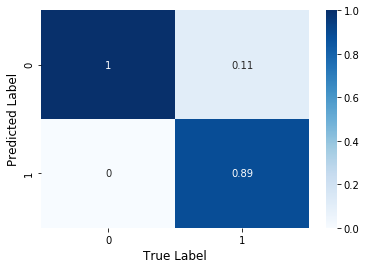

In [59]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [60]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner_lg = pd.concat([BB_Kannada_participant, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner_lg[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Bhoomi Shetty,0.001446
1,Chaitra Kottur,0.001446
2,Chandan Achar,0.001410
3,Chandana Ananthakrishna,0.001446
4,Deepika Das,0.001446
5,Harish Raj,0.001410
6,Jai Jagadish,0.001410
7,Kishan Belagali,0.002075
8,Kuri Prathap,0.001410
9,Priyanka,0.001446


## Predicted Winner for Bigg Boss Kannada Season 7, as per Logistic Regression

In [61]:
# Predicted Winner for Bigg Boss Kannada Season 7, as per LogisticRegression
# winner_lg.iloc[winner_lg.Predicted_Winner.argmax()]['Name']
winner_lg.iloc[np.argwhere(winner_lg.Predicted_Winner == np.amax(winner_lg.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
7,Kishan Belagali,0.002075
13,Vasuki Vaibhav,0.002075


In [64]:
# RandomForest
rf = RandomForestClassifier(n_estimators=300, random_state=2019).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)

In [63]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

# n_estimators=200 accuracy 99.35

F1 Score - 99.33696433544242
Accuracy Score - 99.35483870967742


In [ ]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [ ]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner_rf = pd.concat([BB_Kannada_participant, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner_rf[['Name','Predicted_Winner']]

## Predicted Winner for Bigg Boss Kannada Season 7, as per Random Forest

In [ ]:
# Predicted Winner for Bigg Boss Kannada Season 7, as per RandomForest
# winner_rf.iloc[winner_rf.Predicted_Winner.argmax()]['Name']
winner_rf.iloc[np.argwhere(winner_rf.Predicted_Winner == np.amax(winner_rf.Predicted_Winner)).flatten().tolist()]

## Neaural Networks (MLP)

In [ ]:
NN = MLPClassifier(random_state=2019)
#NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 20), random_state=2019)
NN.fit(x_train, y_train)

In [ ]:
predicted_val_nn = NN.predict(x_val)
# predicted_val_nn = NN.predict_proba(x_val)[:,1]
# y_predicted_val = (predicted_val_nn > 0.03).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

In [ ]:
# Confusion Matrix
plot_confusion_matrix()

In [ ]:
predicted_val_nn = NN.predict(test)
winner_nn = pd.concat([BB_Kannada_participant, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner_nn[['Name','Predicted_Winner']]

In [ ]:
# Predicted Winner for Bigg Boss Kannada Season 7, as per Neaural Networks (Multi Layer Perceptron)
# winner_nn.iloc[winner_nn.Predicted_Winner.argmax()]['Name']